<a href="https://colab.research.google.com/github/vansh123321/Projects/blob/master/Analysis_on_Coronavirus.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Analysis and Prediction on the Coronavirus (Italy)

### by Vansh Jatana

## Current Scenario

At the time of this writing, there are 9,172 confirmed cases according to the WHO. Italy is a member state of the European Union and is a popular tourist destination. Italy's first case was confirmed on January 30th, when two infected Chinese tourists were found. Italy is the most infected country in Europe and second most affected region after China. Many Italian visitors were confirmed as being infected with Coronavirus after visiting other countries. Many countries, including Asia, America, and Europe, trace their local cases to Italy. In the very beginning of the outbreak, only the northern area of Italy was affected; but after a very short time, it had spread to all of Italy.

## Libraries

In [3]:
# Install a pip package in the current Jupyter kernel
import sys
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import datetime
from datetime import date, timedelta
from sklearn.cluster import KMeans
from fbprophet import Prophet
from fbprophet.plot import plot_plotly, add_changepoints_to_plot
import plotly.offline as py
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import statsmodels.api as sm
from keras.models import Sequential
from keras.layers import LSTM,Dense
from keras.layers import Dropout
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

Using TensorFlow backend.


In [4]:
!pip install plotly_express


In [5]:
import plotly_express as px


## Reading Data

In [6]:
data=pd.read_csv("/content/input_covid19-in-total_covid19_italy_region.csv")

In [7]:
an_data = pd.read_csv("/content/input_novel-corona-virus-2019-dataset_COVID19_open_line_list.csv")

## Looking into the Data

In [8]:
an_data.head()

,ID,age,sex,city,province,country,wuhan(0)_not_wuhan(1),latitude,longitude,geo_resolution,date_onset_symptoms,date_admission_hospital,date_confirmation,symptoms,lives_in_Wuhan,travel_history_dates,travel_history_location,reported_market_exposure,additional_information,chronic_disease_binary,chronic_disease,source,sequence_available,outcome,date_death_or_discharge,notes_for_discussion,location,admin3,admin2,admin1,country_new,admin_id,data_moderator_initials,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40,Unnamed: 41,Unnamed: 42,Unnamed: 43,Unnamed: 44
0,1.0,30,male,"Chaohu City, Hefei City",Anhui,China,1.0,31.646960,117.716600,admin3,18.01.2020,20.01.2020,22.01.2020,NaN,yes,17.01.2020,Wuhan,NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Chaohu City,Hefei City,Anhui,China,340181,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2.0,47,male,"Baohe District, Hefei City",Anhui,China,1.0,31.778630,117.331900,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,10.01.2020,"Luzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Baohe District,Hefei City,Anhui,China,340111,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,3.0,49,male,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,15.01.2020,20.01.2020,23.01.2020,NaN,no,10.01.2020,"Yinzhou Hunan, via Wuhan",NaN,NaN,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,4.0,47,female,"High-Tech Zone, Hefei City",Anhui,China,1.0,31.828313,117.224844,point,17.01.2020,20.01.2020,23.01.2020,NaN,no,NaN,NaN,NaN,contacted with confirmed case,NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,High-Tech Zone,Shushan District,Hefei City,Anhui,China,340104,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,5.0,50,female,"Feidong County, Hefei City",Anhui,China,1.0,32.001230,117.568100,admin3,10.01.2020,21.01.2020,23.01.2020,NaN,no,07.01.2020,Wuhan,NaN,"06.01.2020 went to Wuhan, 07.01.2020 returned ...",NaN,NaN,http://ah.people.com.cn/GB/n2/2020/0127/c35826...,NaN,NaN,NaN,NaN,NaN,Feidong County,Hefei City,Anhui,China,340122,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [9]:
an_data = an_data[an_data['country']=='Italy']
an_data.shape


(588, 45)

## Age Distribution of Confirmation

/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in greater

/usr/local/lib/python2.7/dist-packages/statsmodels/nonparametric/kde.py:447: RuntimeWarning:

invalid value encountered in less



[(0, 133.1891721424099)]

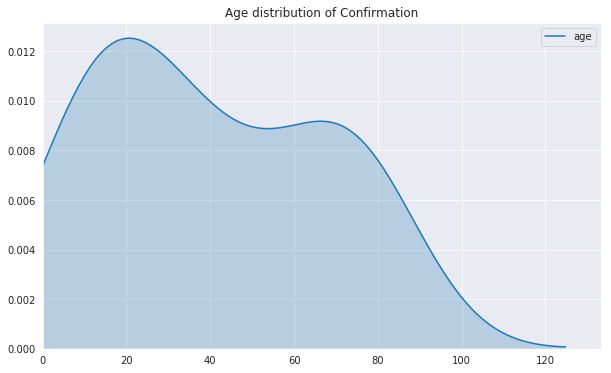

In [10]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of Confirmation")
sns.kdeplot(data=an_data['age'], shade=True).set(xlim=(0))

## Age

Here, the graph shows the age distribution of infected people by gender. We can clearly see that older people are more likely to become infected, especially older people that have lung disease or respiratory system problems. Men in the 40 to 50 year age group are more likely to be infected. In comparison, women aged 50 to 70 years are more likely to be infected. As Dr. Steven Gambert, professor of medicine and director of geriatrics at the University of Maryland School of Medicine says, "Older people have higher risk of underlying health conditions; older people are already under physical stress, and their immune systems, even if not significantly compromised, simply do not have the same ability to fight viruses and bacteria.” Data shows that Italy has the oldest population across the globe, by count. According to EU statistics, Italy has the lowest percentage of young people.

## Gender Distribution of Confirmation

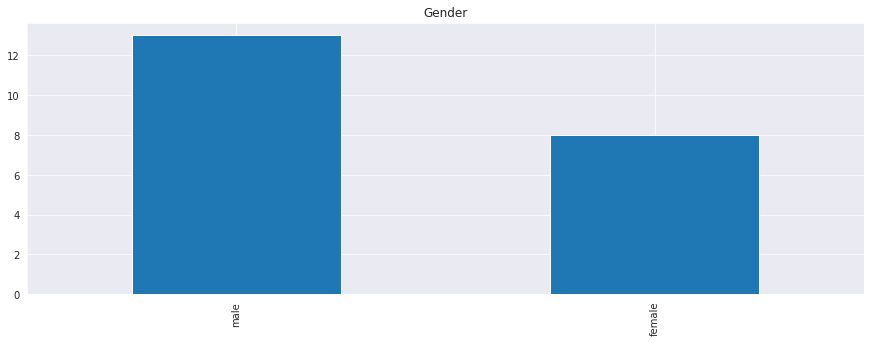

In [11]:
plt.figure(figsize=(15, 5))
plt.title('Gender')
an_data.sex.value_counts().plot.bar();

In [12]:
fig = px.pie( values=an_data.groupby(['sex']).size().values,names=an_data.groupby(['sex']).size().index)
fig.update_layout(
    font=dict(
        size=15,
        color="#242323"
    )
    )   
    
py.iplot(fig)

## Gender

The graph shows the age distribution of infected and confirmed people by gender, where men are more likely to die from coronavirus than women. Research has found that middle-aged and older men are more likely to get infected by the virus. Researchers found that the infection rate among men and women is the same, but the death rate among men is 2.8% as compared to 1.7% for women. Some of the factors thought to explain why men are more likely to die from the coronavirus include:

* Men lack the heightened immunity system found in women
* In China, 50%-80% of men smoke, compared to only 2%-3% of women

## Age Distribution of Confirmation by Gender

In [13]:
male_dead = an_data[an_data.sex=='male']
female_dead = an_data[an_data.sex=='female']

[(0, 163.9277045948024)]

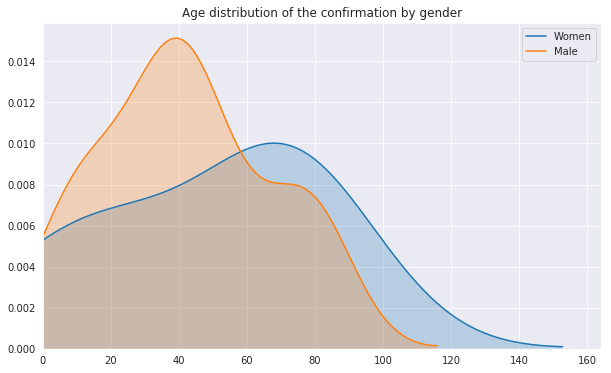

In [14]:
plt.figure(figsize=(10,6))
sns.set_style("darkgrid")
plt.title("Age distribution of the confirmation by gender")
sns.kdeplot(data=female_dead['age'], label="Women", shade=True).set(xlim=(0))
sns.kdeplot(data=male_dead['age'],label="Male" ,shade=True).set(xlim=(0))


In [15]:
data.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,0,2020-02-24 18:00:00,ITA,13,Abruzzo,42.351222,13.398438,0,0,0,0,0,0,0,0,0,5
1,1,2020-02-24 18:00:00,ITA,17,Basilicata,40.639471,15.805148,0,0,0,0,0,0,0,0,0,0
2,2,2020-02-24 18:00:00,ITA,4,P.A. Bolzano,46.499335,11.356624,0,0,0,0,0,0,0,0,0,1
3,3,2020-02-24 18:00:00,ITA,18,Calabria,38.905976,16.594402,0,0,0,0,0,0,0,0,0,1
4,4,2020-02-24 18:00:00,ITA,15,Campania,40.839566,14.250850,0,0,0,0,0,0,0,0,0,10


## Checking for Null Values

In [16]:
data.isna().sum()

SNo                          0
Date                         0
Country                      0
RegionCode                   0
RegionName                   0
Latitude                     0
Longitude                    0
HospitalizedPatients         0
IntensiveCarePatients        0
TotalHospitalizedPatients    0
HomeConfinement              0
CurrentPositiveCases         0
NewPositiveCases             0
Recovered                    0
Deaths                       0
TotalPositiveCases           0
TestsPerformed               0
dtype: int64

## Description of the Data

In [17]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
SNo,441.0,220.000000,127.449990,0.000000,110.000000,220.000000,330.000000,440.000000
RegionCode,441.0,10.190476,5.801646,1.000000,5.000000,10.000000,15.000000,20.000000
Latitude,441.0,43.046293,2.491607,38.115697,41.125596,43.616760,45.434905,46.499335
Longitude,441.0,12.225955,2.661968,7.320149,11.121231,12.388247,13.768136,16.867367
HospitalizedPatients,441.0,142.387755,564.718077,0.000000,1.000000,8.000000,53.000000,5500.000000
IntensiveCarePatients,441.0,26.056689,86.363155,0.000000,0.000000,1.000000,11.000000,767.000000
TotalHospitalizedPatients,441.0,168.446712,649.869992,0.000000,1.000000,8.000000,64.000000,6267.000000
HomeConfinement,441.0,111.945578,347.705017,0.000000,1.000000,10.000000,71.000000,3776.000000
CurrentPositiveCases,441.0,280.390023,972.878373,0.000000,2.000000,19.000000,139.000000,10043.000000
NewPositiveCases,441.0,46.718821,147.650810,-63.000000,0.000000,5.000000,30.000000,1336.000000


## Tracking the Patient

In [18]:
data.shape

(441, 17)

In [19]:
clus=data.loc[:,['SNo','Latitude','Longitude']]
clus.head()

,SNo,Latitude,Longitude
0,0,42.351222,13.398438
1,1,40.639471,15.805148
2,2,46.499335,11.356624
3,3,38.905976,16.594402
4,4,40.839566,14.250850


## Checking for Number of Cluster

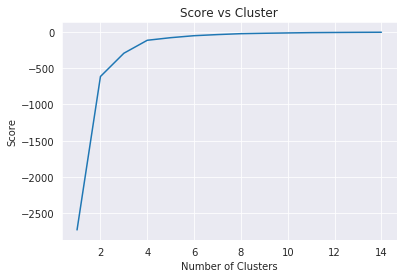

In [20]:
K_clusters = range(1,15)
kmeans = [KMeans(n_clusters=i) for i in K_clusters]
Y_axis = data[['Latitude']]
X_axis = data[['Longitude']]
score = [kmeans[i].fit(Y_axis).score(Y_axis) for i in range(len(kmeans))]
plt.plot(K_clusters, score)
plt.xlabel('Number of Clusters')
plt.ylabel('Score')
plt.title('Score vs Cluster')
plt.show()

**The score becomes constant after four clusters, so making more clusters will not help us. The value for k is 4 in this case.**

In [21]:
kmeans = KMeans(n_clusters = 4, init ='k-means++')
kmeans.fit(clus[clus.columns[1:3]])
clus['cluster_label'] = kmeans.fit_predict(clus[clus.columns[1:3]])
centers = kmeans.cluster_centers_
labels = kmeans.predict(clus[clus.columns[1:3]])

## Graphical Representation of Clusters

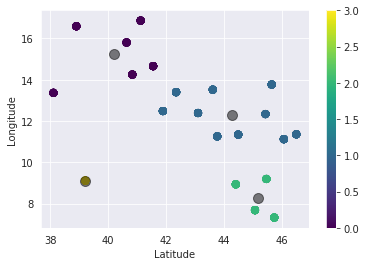

In [22]:
clus.plot.scatter(x = 'Latitude', y = 'Longitude', c=labels, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=100, alpha=0.5)

**We will verify our clusters by putting values onto a world map generated through use of the folium library.**

**Affected places shown on the world map include Hospitalised, Confirm, Deaths, and Recovery.**

In [23]:
import folium
italy_map = folium.Map(location=[42.8719,12.5674 ], zoom_start=5,tiles='Stamen Toner')

for lat, lon,RegionName,TotalPositiveCases,Recovered,Deaths,TotalHospitalizedPatients in zip(data['Latitude'], data['Longitude'],data['RegionName'],data['TotalPositiveCases'],data['Recovered'],data['Deaths'],data['TotalHospitalizedPatients']):
    folium.CircleMarker([lat, lon],
                        radius=5,
                        color='red',
                      popup =('RegionName: ' + str(RegionName) + '<br>'
                    'TotalPositiveCases: ' + str(TotalPositiveCases) + '<br>'
                    'TotalHospitalizedPatients: ' + str(TotalHospitalizedPatients) + '<br>'
                      'Recovered: ' + str(Recovered) + '<br>'
                      'Deaths: ' + str(Deaths) + '<br>'),

                        fill_color='red',
                        fill_opacity=0.7 ).add_to(italy_map)
italy_map

**Early on, the most severely affected cities and regions in Italy were Lombardy and then Emilia-Romagna, Veneto, Marche, and Piemonte. Milan is the second most populous Italian city and is located in Lombardy. Other areas in Italy that are affected by coronavirus include Toscana, Campania, Lazio, Liguria, Friuli Venezia Giulia, Sicilia, Puglia, Umbria, Abruzzo, Trento, Molise, Calabria, Sardegna, Valle d’Aosta, Basilicata, and Bolzano. Italy was the fourth most affected country as of February, but now it has the highest number of confirmed cases after China.**

## Grouping Data According to Region Name

In [24]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
daily = data.sort_values(['Date','Country','RegionName'])
latest = data[data.Date == daily.Date.max()]
latest.head()

,SNo,Date,Country,RegionCode,RegionName,Latitude,Longitude,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,CurrentPositiveCases,NewPositiveCases,Recovered,Deaths,TotalPositiveCases,TestsPerformed
420,420,2020-03-15,ITA,13,Abruzzo,42.351222,13.398438,72,28,100,28,128,22,6,3,137,1419
421,421,2020-03-15,ITA,17,Basilicata,40.639471,15.805148,0,2,2,9,11,1,0,0,11,208
422,422,2020-03-15,ITA,4,P.A. Bolzano,46.499335,11.356624,50,4,54,145,199,29,0,5,204,1497
423,423,2020-03-15,ITA,18,Calabria,38.905976,16.594402,32,6,38,28,66,7,1,1,68,884
424,424,2020-03-15,ITA,15,Campania,40.839566,14.250850,73,22,95,201,296,53,28,9,333,2213


In [25]:
data_groupby_region = latest.groupby("RegionName")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgr = data_groupby_region 
dgr.head()

,RegionName,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,Abruzzo,137,3,6,1419,72,100
1,Basilicata,11,0,0,208,0,2
2,Calabria,68,1,1,884,32,38
3,Campania,333,9,28,2213,73,95
4,Emilia Romagna,3093,284,68,12054,1215,1384


## Description of Grouped Data by Region

In [26]:
dgr.describe().T

,count,mean,std,min,25%,50%,75%,max
TotalPositiveCases,21.0,1178.428571,2876.244645,11.0,137.0,333.0,781.0,13272.0
Deaths,21.0,86.142857,266.741127,0.0,2.0,8.0,33.0,1218.0
Recovered,21.0,111.190476,436.261231,0.0,0.0,5.0,24.0,2011.0
TestsPerformed,21.0,5947.571429,10613.996710,208.0,965.0,2017.0,4375.0,40369.0
HospitalizedPatients,21.0,460.142857,1192.702238,0.0,32.0,73.0,253.0,5500.0
TotalHospitalizedPatients,21.0,539.761905,1357.938434,2.0,38.0,100.0,319.0,6267.0


## Test Performed vs Region

In [27]:
fig = px.bar(dgr[['RegionName', 'TestsPerformed']].sort_values('TestsPerformed', ascending=False), 
             y="TestsPerformed", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Test Performed vs Region')
fig.show()


**As the graph shows, the test was performed in different regions of Italy. Lombardia shows the maximum number of tests performed (over 25,000), as cities are most highly affected. As a result, the next graph shows that the region also has the highest number of positive coronavirus patients (7,280). Veneto is the second most infected city, followed by Emilia Romagna, Lazio, Marche, Toscana, Piemonte, Friuli V.G., Campania, Sicilia, Liguria, Puglia, P.A. Trento, Calabria, Umbria, Abruzzo, Sardegna, Molisa, Basilicata, Valle d'Aosta, P.A. Bolzano, etc.**

## Confirmed Cases vs Region

In [28]:
fig = px.bar(dgr[['RegionName', 'TotalPositiveCases']].sort_values('TotalPositiveCases', ascending=False), 
             y="TotalPositiveCases", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Confirmed Cases vs Region')
fig.show()


**There are more than 10,000 people who are infected with this virus. Italy is the most affected country in the world after China, with 827 deaths and 12,462 confirmed cases in almost three weeks. The government has restricted all flights from China because, at the end of January, two Chinese tourists came down with coronavirus during a trip to Italy. At the time, it was hoped to be the best measure to block the spread of the disease.**

## Hospitalized Patients vs Region

In [29]:
fig = px.bar(dgr[['RegionName', 'TotalHospitalizedPatients']].sort_values('TotalHospitalizedPatients', ascending=False), 
             y="TotalHospitalizedPatients", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Hospitalised Patient vs Region')
fig.show()

## Recovery vs Region

In [30]:
fig = px.bar(dgr[['RegionName', 'Recovered']].sort_values('Recovered', ascending=False), 
             y="Recovered", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Revovery vs Region')
fig.show()


## Death vs Region Name

In [31]:
fig = px.bar(dgr[['RegionName', 'Deaths']].sort_values('Deaths', ascending=False), 
             y="Deaths", x="RegionName", color='RegionName', 
             log_y=True, template='ggplot2', title='Death vs Region')
fig.show()


In [32]:
dgrs_el = dgr.sort_values(by=['TotalPositiveCases'],ascending = False)
dgrs_el.head()

,RegionName,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
8,Lombardia,13272,1218,2011,40369,5500,6267
4,Emilia Romagna,3093,284,68,12054,1215,1384
20,Veneto,2172,63,120,32546,426,555
9,Marche,1133,46,0,2946,521,619
13,Piemonte,1111,81,0,4375,726,897


## Test and Confirm vs Region

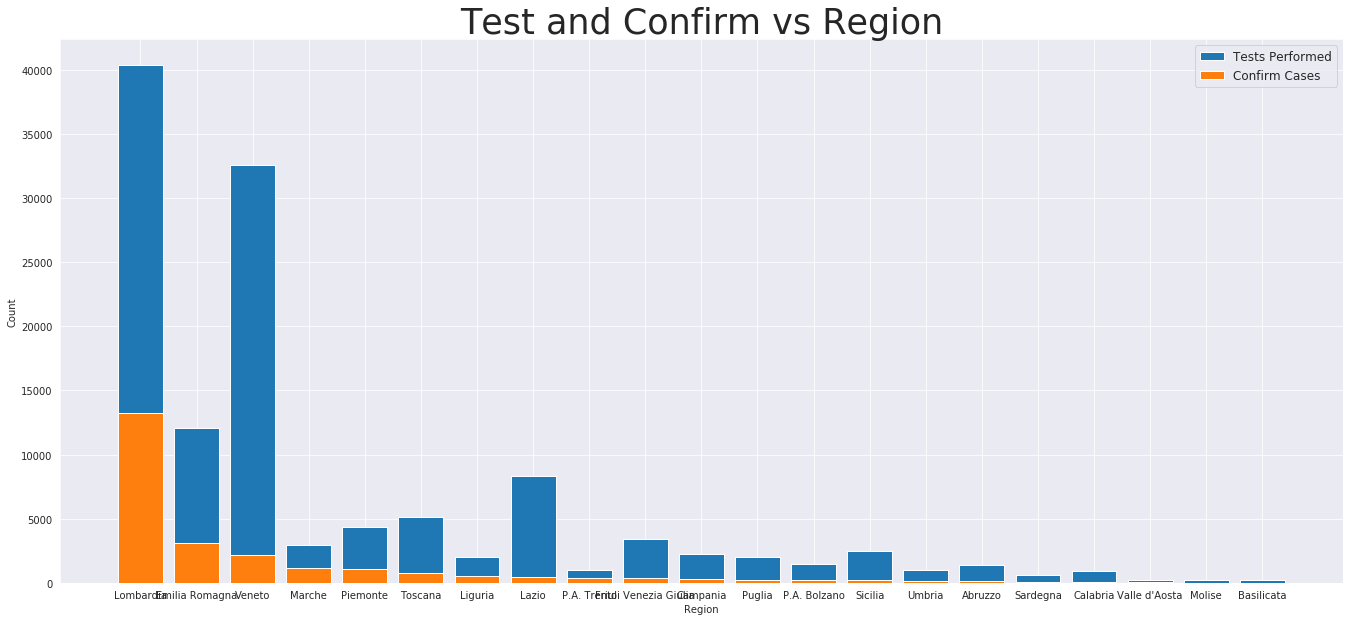

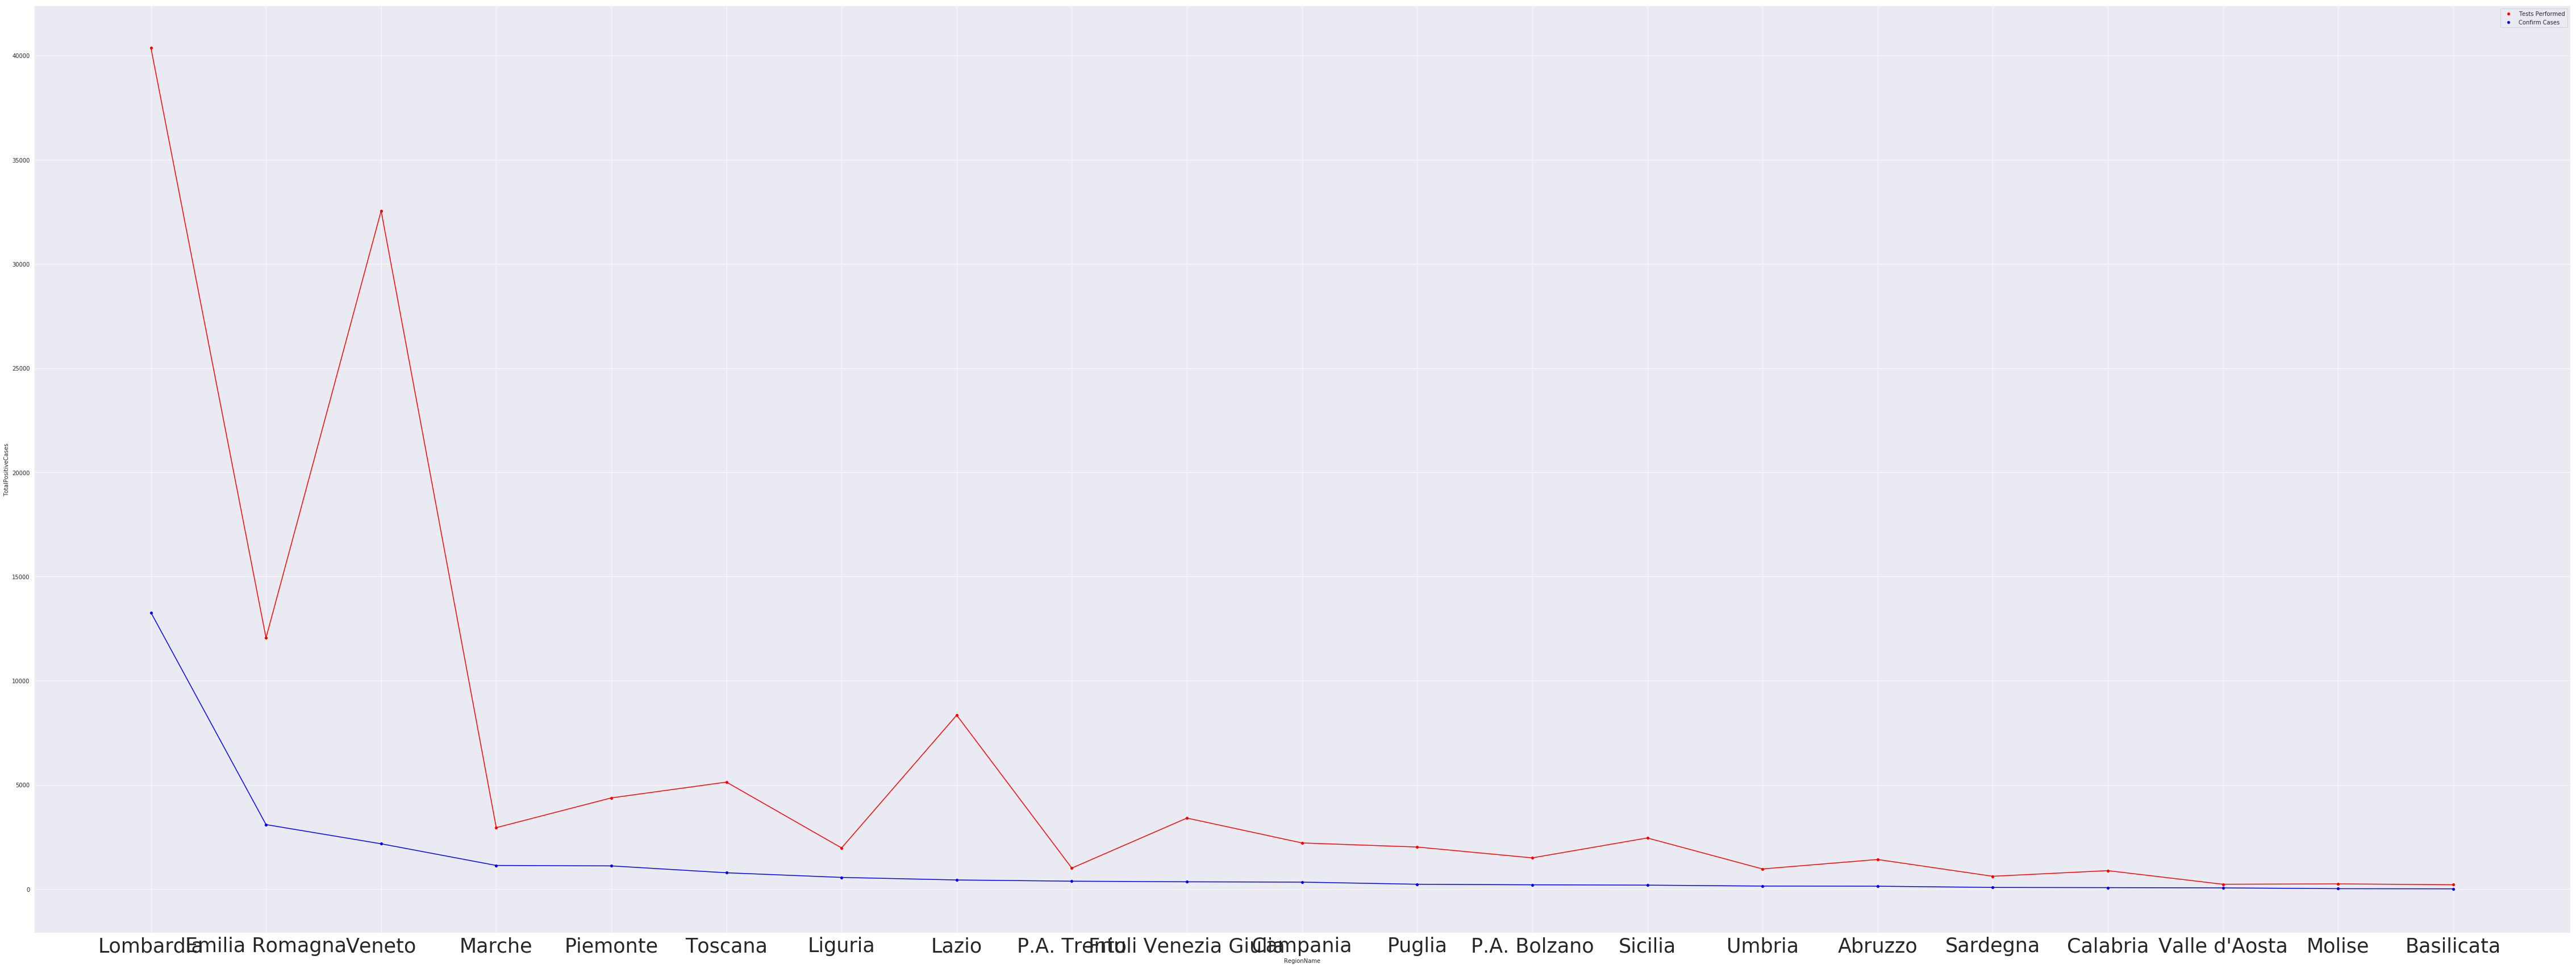

In [33]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TestsPerformed,label="Tests Performed")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test and Confirm vs Region',fontsize = 35)

plt.show()

f, ax = plt.subplots(figsize=(80,30))
ax=sns.scatterplot(x="RegionName", y="TestsPerformed", data=dgrs_el,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax.xaxis.set_tick_params(labelsize=35)

plt.plot(dgrs_el.RegionName,dgrs_el.TestsPerformed,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")

## Confirmed Cases vs People Hospitalized

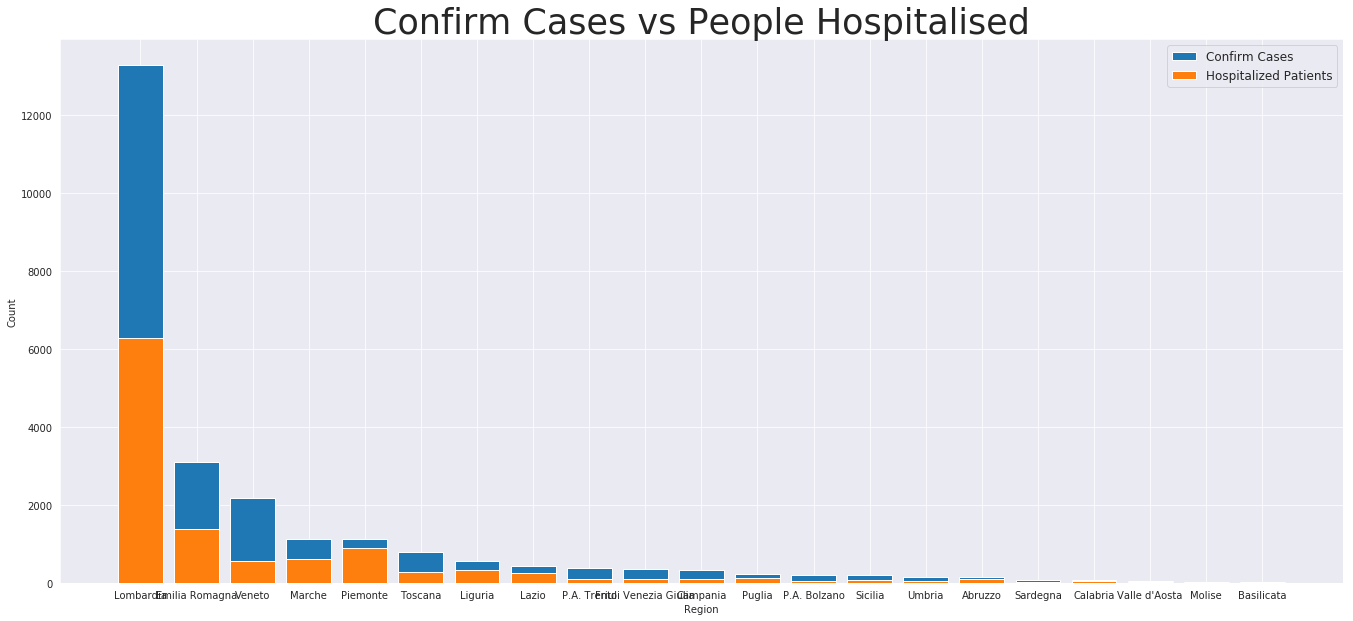

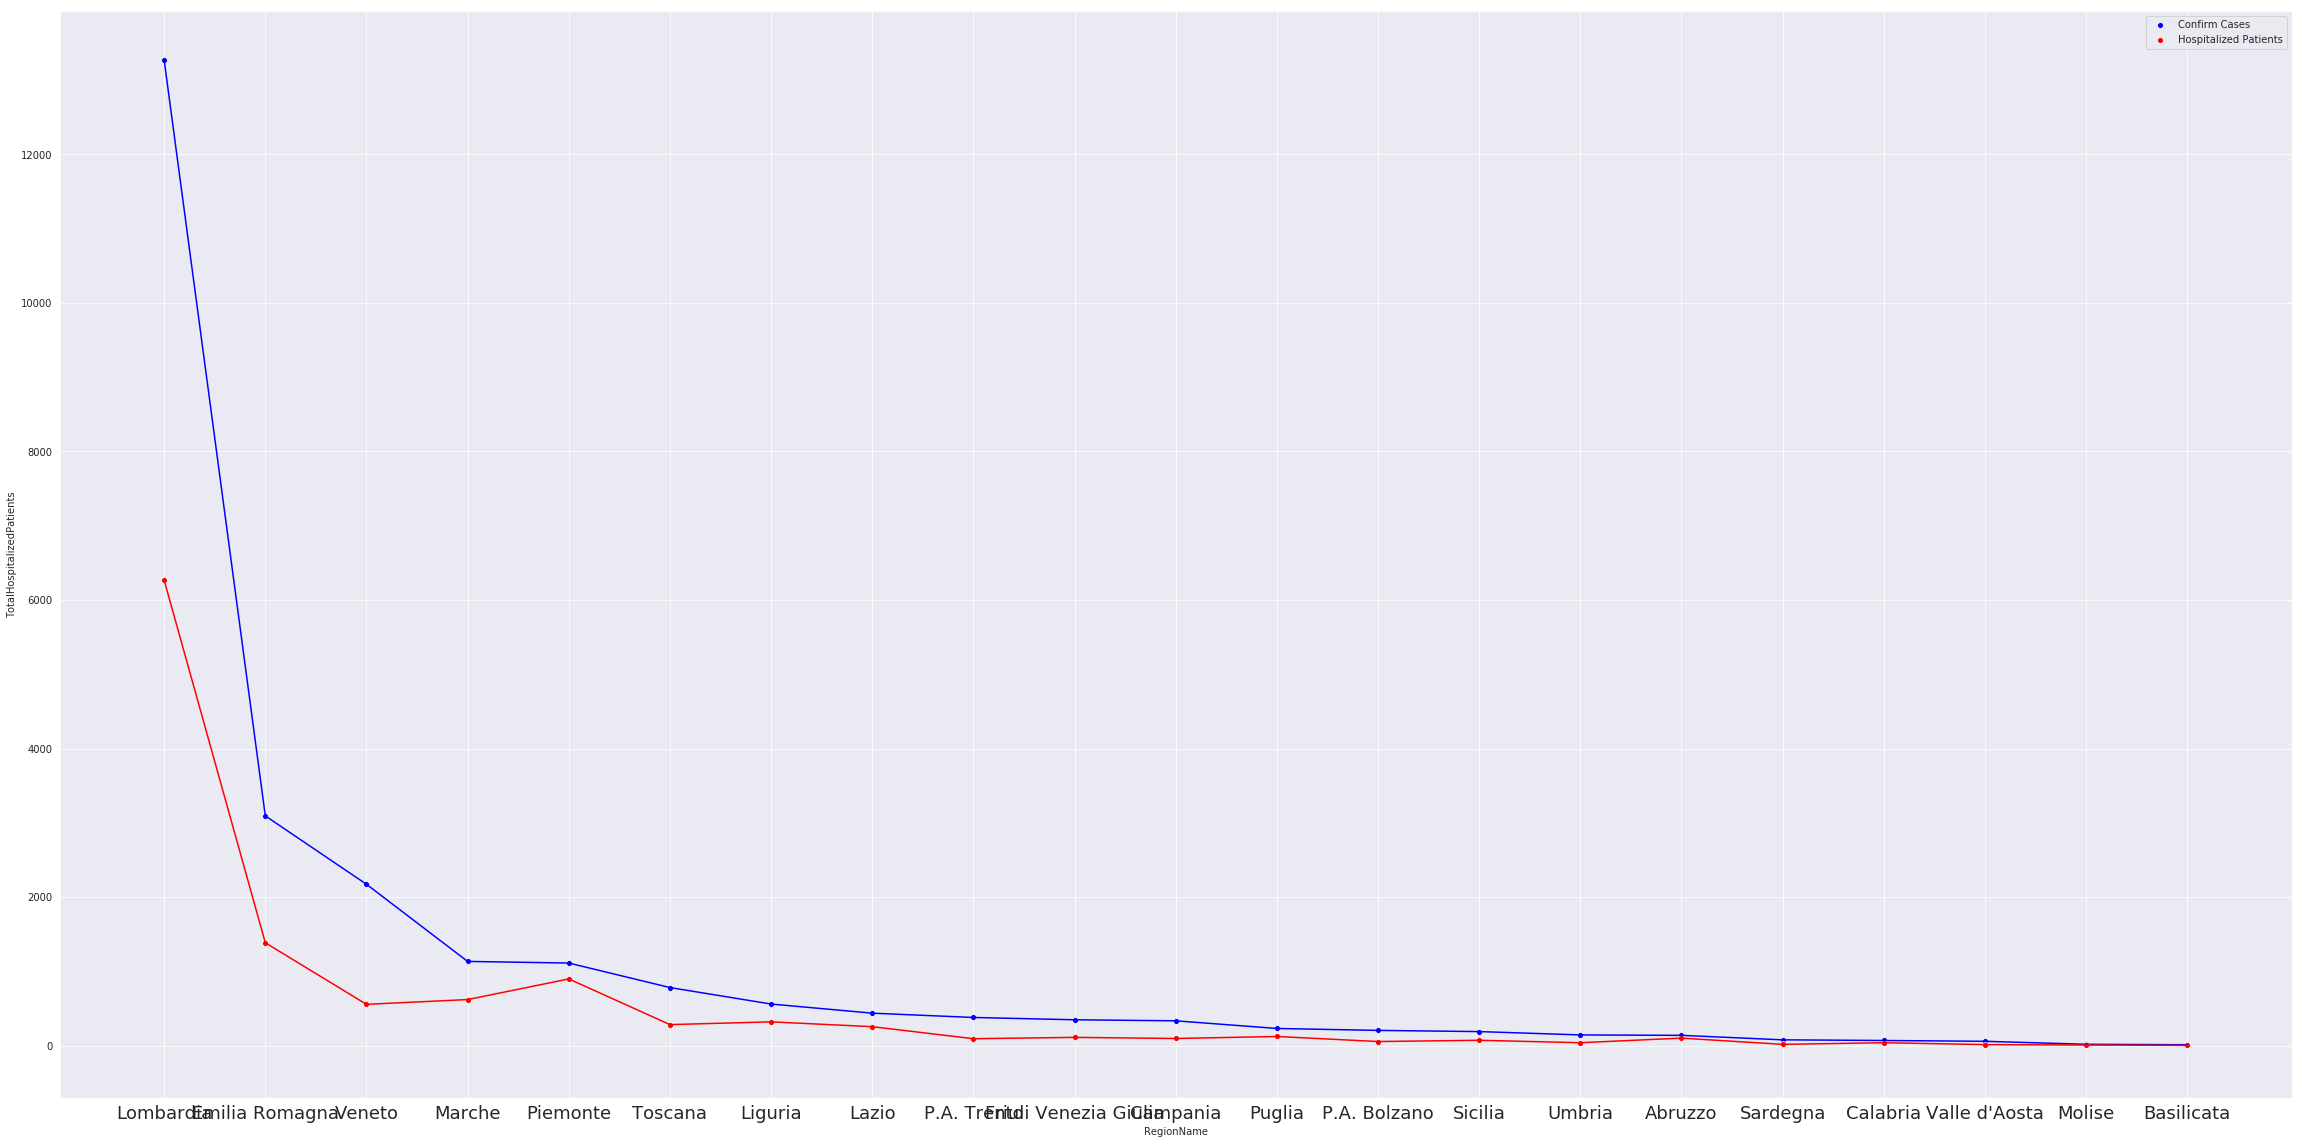

In [34]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgrs_el.RegionName, dgrs_el.TotalHospitalizedPatients,label="Hospitalized Patients")

plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm Cases vs People Hospitalised',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(40,20))

ax=sns.scatterplot(x="RegionName", y="TotalPositiveCases", data=dgrs_el,
             color="blue",label = "Confirm Cases")
ax=sns.scatterplot(x="RegionName", y="TotalHospitalizedPatients", data=dgrs_el,
             color="red",label = "Hospitalized Patients")
ax.xaxis.set_tick_params(labelsize=18)
plt.plot(dgrs_el.RegionName,dgrs_el.TotalPositiveCases,zorder=1,color="blue")
plt.plot(dgrs_el.RegionName,dgrs_el.TotalHospitalizedPatients,zorder=1,color="red")


**The graph shows statistical data direct from the WHO. The data shows that in Lombardia, after more than 7,000 confirmed cases, there are only approximately 4,500 people who are hospitalized. This has become a crisis situation in Italy. Hospital conditions are becoming worse day by day. According to the doctors, not every patient is getting proper and equal care, and that is the main cause of multifold spread of coronavirus. The whole country is locked down. Government has announced there will be no gatherings, no sporting events, and no travelling across the country because of the high number of deaths.**

## Death and Recovery vs Region

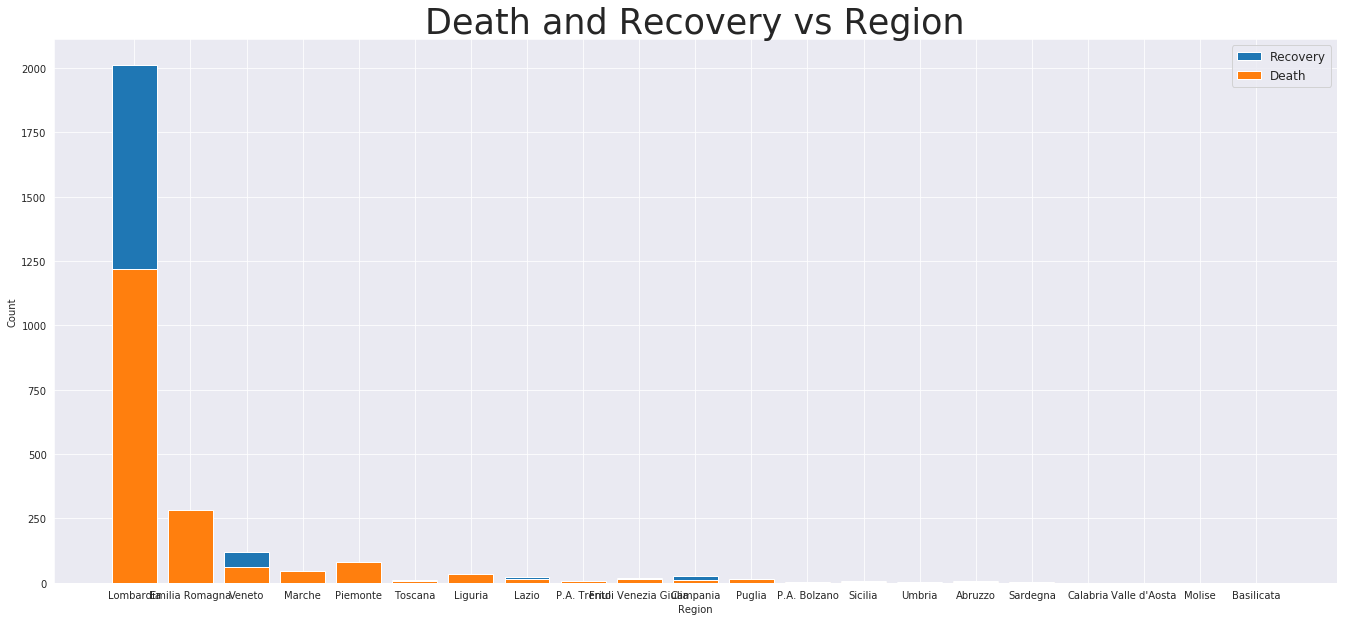

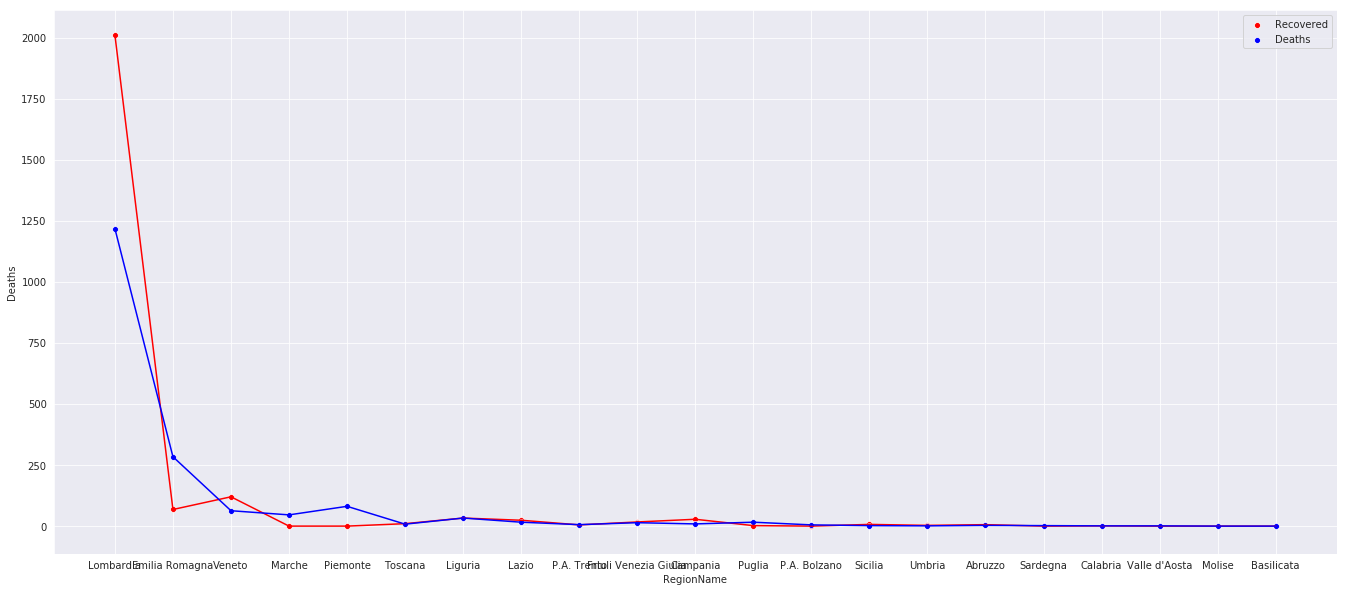

In [35]:
plt.figure(figsize=(23,10))
plt.bar(dgrs_el.RegionName, dgrs_el.Recovered,label="Recovery")
plt.bar(dgrs_el.RegionName, dgrs_el.Deaths,label="Death")
plt.xlabel('Region')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Death and Recovery vs Region', fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="RegionName", y="Recovered", data=dgrs_el,
             color="red",label = "Recovered")
ax=sns.scatterplot(x="RegionName", y="Deaths", data=dgrs_el,
             color="blue",label = "Deaths")
plt.plot(dgrs_el.RegionName,dgrs_el.Recovered,zorder=1,color="red")
plt.plot(dgrs_el.RegionName,dgrs_el.Deaths,zorder=1,color="blue")

**According to the graph, the recovery rate of the patients is very slow. There are a few common reasons behind the rapid increase in the number of people infected by the coronavirus. According to the data, the number of hospitalized people is far fewer than the number of people infected by the novel coronavirus. Cases have now been confirmed in every member nation of the European Union. Italy will remain totally locked down as its healthcare system struggles to cope. Nearby countries like Germany and France report alarming spikes in daily cases.**

In [36]:
data['Date'] = pd.to_datetime(data['Date']).dt.normalize()
latest = data[data.Date == daily.Date.max()]

In [37]:
temp = latest.loc[:,['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']]
temp.head()

,Date,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,Recovered,Deaths,TotalPositiveCases,TestsPerformed
420,2020-03-15,72,28,100,28,6,3,137,1419
421,2020-03-15,0,2,2,9,0,0,11,208
422,2020-03-15,50,4,54,145,0,5,204,1497
423,2020-03-15,32,6,38,28,1,1,68,884
424,2020-03-15,73,22,95,201,28,9,333,2213


## Description of data Grouped by Date

In [38]:
temp.describe().T

,count,mean,std,min,25%,50%,75%,max
HospitalizedPatients,21.0,460.142857,1192.702238,0.0,32.0,73.0,253.0,5500.0
IntensiveCarePatients,21.0,79.619048,167.072283,0.0,6.0,19.0,98.0,767.0
TotalHospitalizedPatients,21.0,539.761905,1357.938434,2.0,38.0,100.0,319.0,6267.0
HomeConfinement,21.0,441.333333,860.254284,9.0,59.0,142.0,275.0,3776.0
Recovered,21.0,111.190476,436.261231,0.0,0.0,5.0,24.0,2011.0
Deaths,21.0,86.142857,266.741127,0.0,2.0,8.0,33.0,1218.0
TotalPositiveCases,21.0,1178.428571,2876.244645,11.0,137.0,333.0,781.0,13272.0
TestsPerformed,21.0,5947.571429,10613.996710,208.0,965.0,2017.0,4375.0,40369.0


In [39]:
data_groupby_date = latest.groupby("Date")[['Date','HospitalizedPatients','IntensiveCarePatients','TotalHospitalizedPatients','HomeConfinement','Recovered','Deaths','TotalPositiveCases','TestsPerformed']].sum().reset_index()
data_groupby_date

,Date,HospitalizedPatients,IntensiveCarePatients,TotalHospitalizedPatients,HomeConfinement,Recovered,Deaths,TotalPositiveCases,TestsPerformed
0,2020-03-15,9663,1672,11335,9268,2335,1809,24747,124899


## Ratio and percentage of Confirmation, Deaths and Deaths, Recovery after Confirmation

In [40]:
ps_ts = float(data_groupby_date.TotalPositiveCases/data_groupby_date.TestsPerformed)
d_ts = float(data_groupby_date.Deaths/data_groupby_date.TestsPerformed)
r_ps = float(data_groupby_date.Recovered/data_groupby_date.TotalPositiveCases)
d_ps = float(data_groupby_date.Deaths/data_groupby_date.TotalPositiveCases)

In [41]:
print("The percentage of Confirmation is "+ str(ps_ts*100) )
print("The percentage of Death is "+ str(d_ts*100) )
print("The percentage of Death after confirmation is "+ str(d_ps*100) )
print("The percentage of recovery after confirmation is "+ str(r_ps*100) )

The percentage of Confirmation is 19.8136093964
The percentage of Death is 1.44837028319
The percentage of Death after confirmation is 7.30997696691
The percentage of recovery after confirmation is 9.43548712975


In [42]:
data_groupby_date1 = data.groupby("Date")[['TotalPositiveCases', 'Deaths', 'Recovered','TestsPerformed','HospitalizedPatients','TotalHospitalizedPatients']].sum().reset_index()
dgd3 = data_groupby_date1
dgd3.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,2020-02-24,229,7,1,4324,101,127
1,2020-02-25,322,10,1,8623,114,150
2,2020-02-26,400,12,3,9587,128,164
3,2020-02-27,650,17,45,12014,248,304
4,2020-02-28,888,21,46,15695,345,409


In [43]:
dgd2 = dgd3

In [44]:
dgd2["Date"]= dgd3["Date"].dt.strftime("%d-%m-%y") 
dgd2.head()

,Date,TotalPositiveCases,Deaths,Recovered,TestsPerformed,HospitalizedPatients,TotalHospitalizedPatients
0,24-02-20,229,7,1,4324,101,127
1,25-02-20,322,10,1,8623,114,150
2,26-02-20,400,12,3,9587,128,164
3,27-02-20,650,17,45,12014,248,304
4,28-02-20,888,21,46,15695,345,409


## Test vs Confirmed


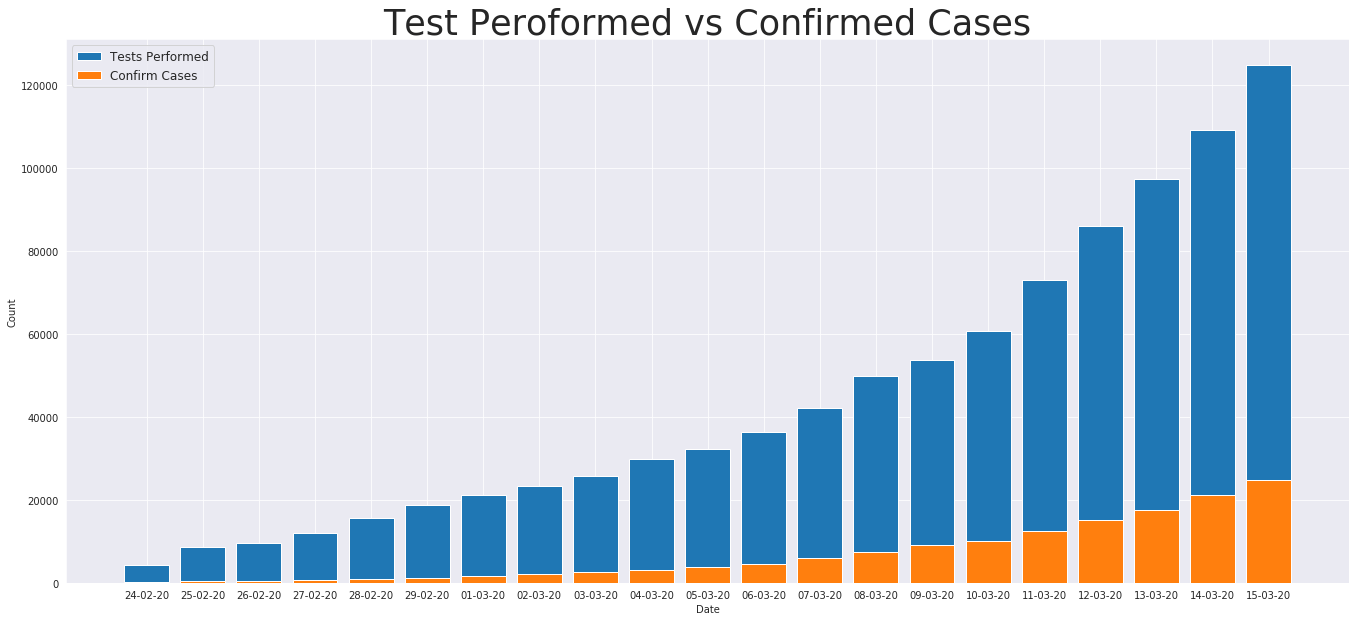

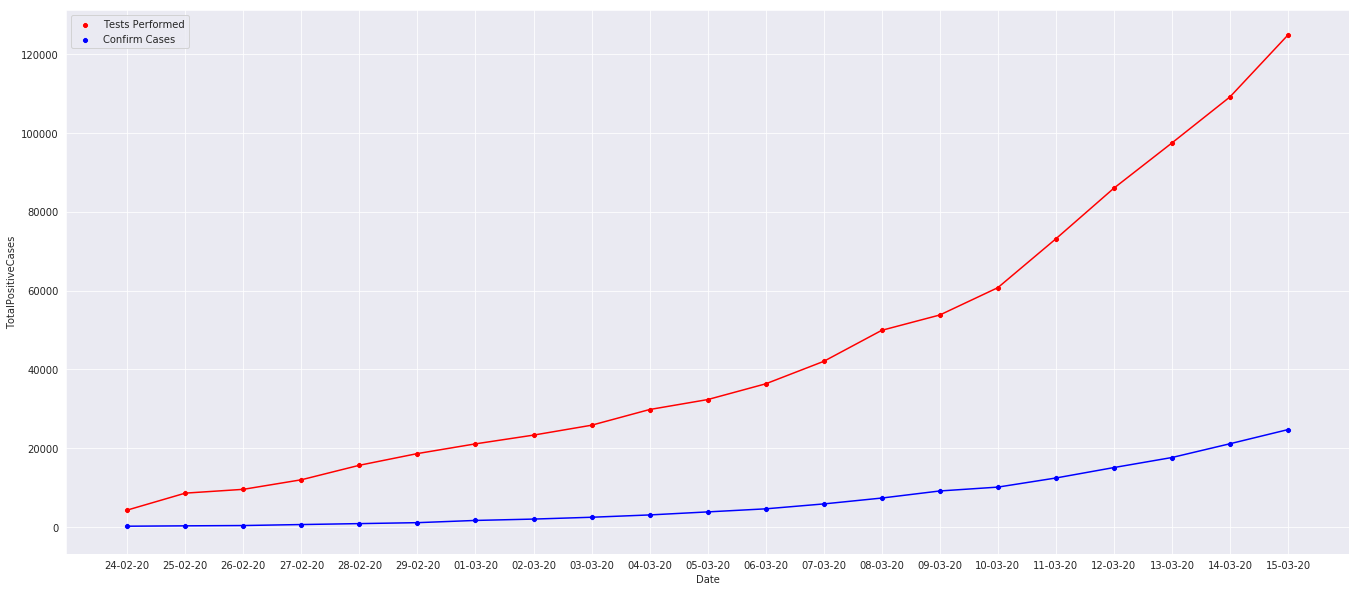

In [45]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TestsPerformed,label="Tests Performed")
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Test Peroformed vs Confirmed Cases',fontsize = 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TestsPerformed", data=dgd2,
             color="red",label = "Tests Performed")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TestsPerformed,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

## Confirmed Cases vs People Hospitalized

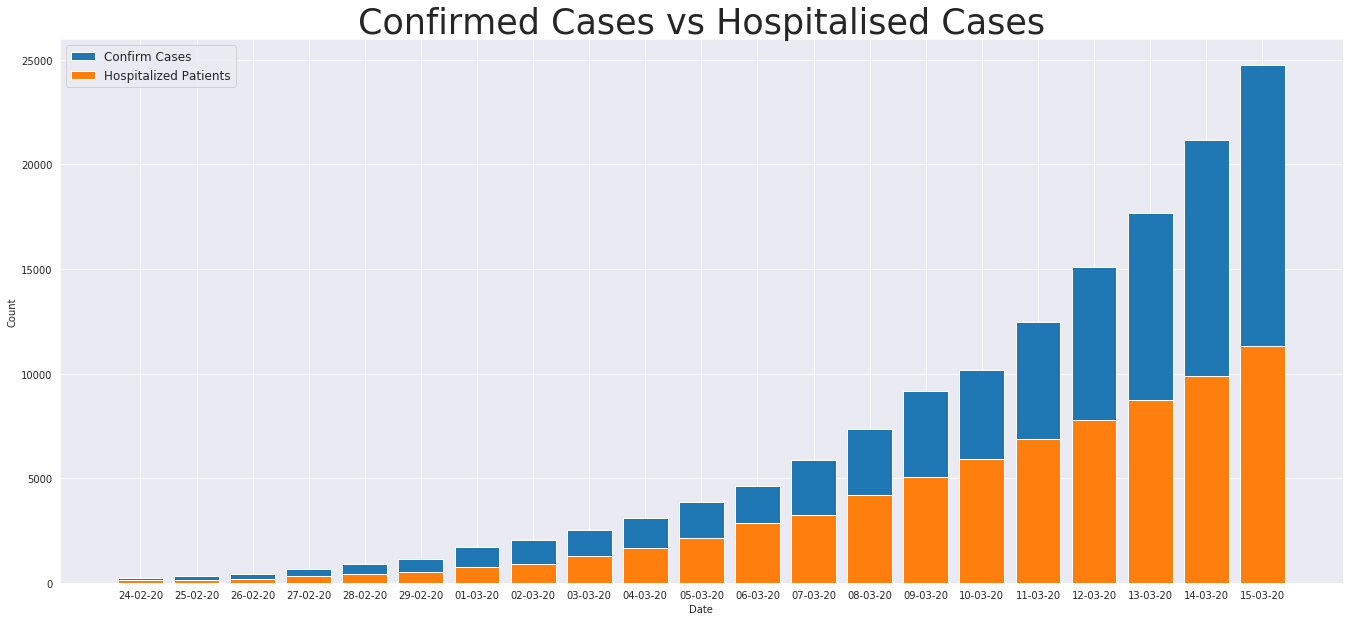

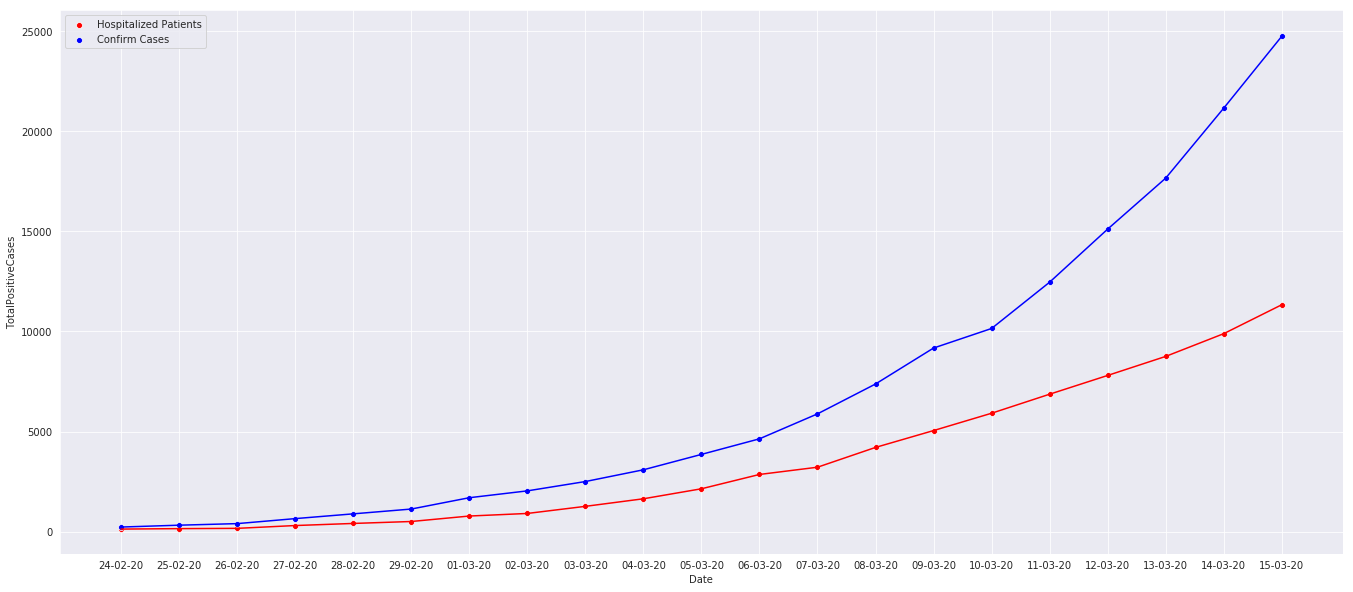

In [46]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm Cases")
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitalized Patients")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirmed Cases vs Hospitalised Cases',fontsize= 35)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="red",label = "Hospitalized Patients")
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="blue",label = "Confirm Cases")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="blue")

## Hospitalized vs Recovery and Death

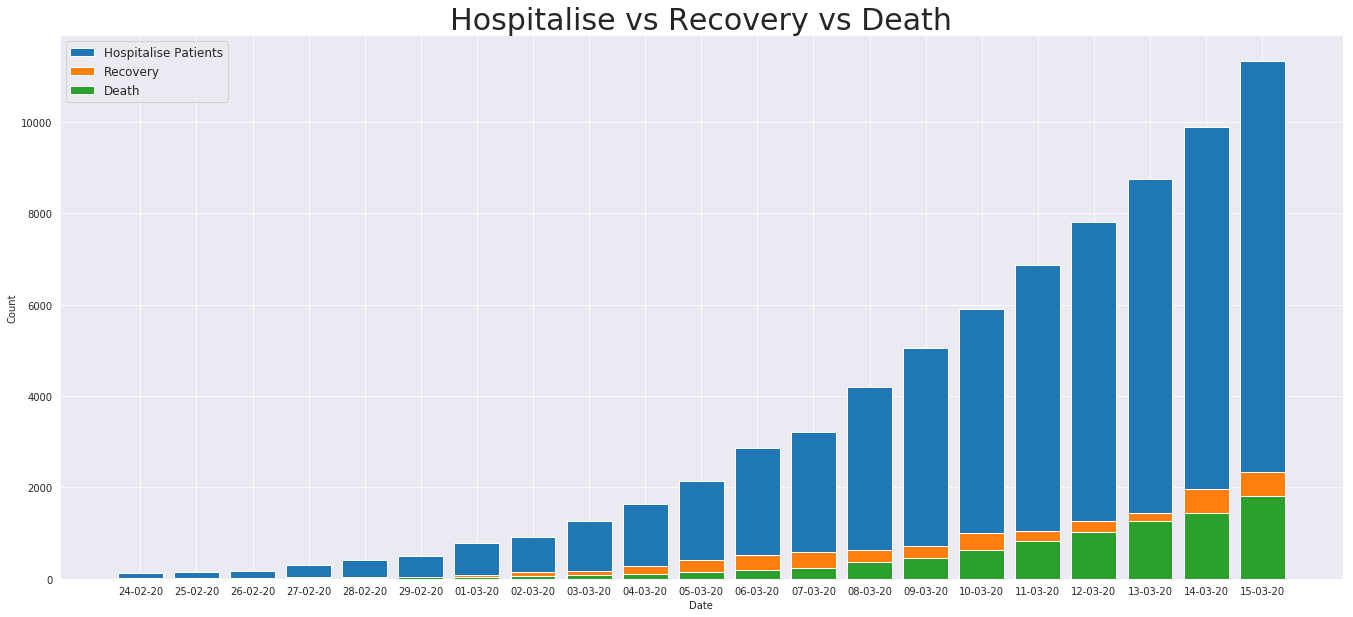

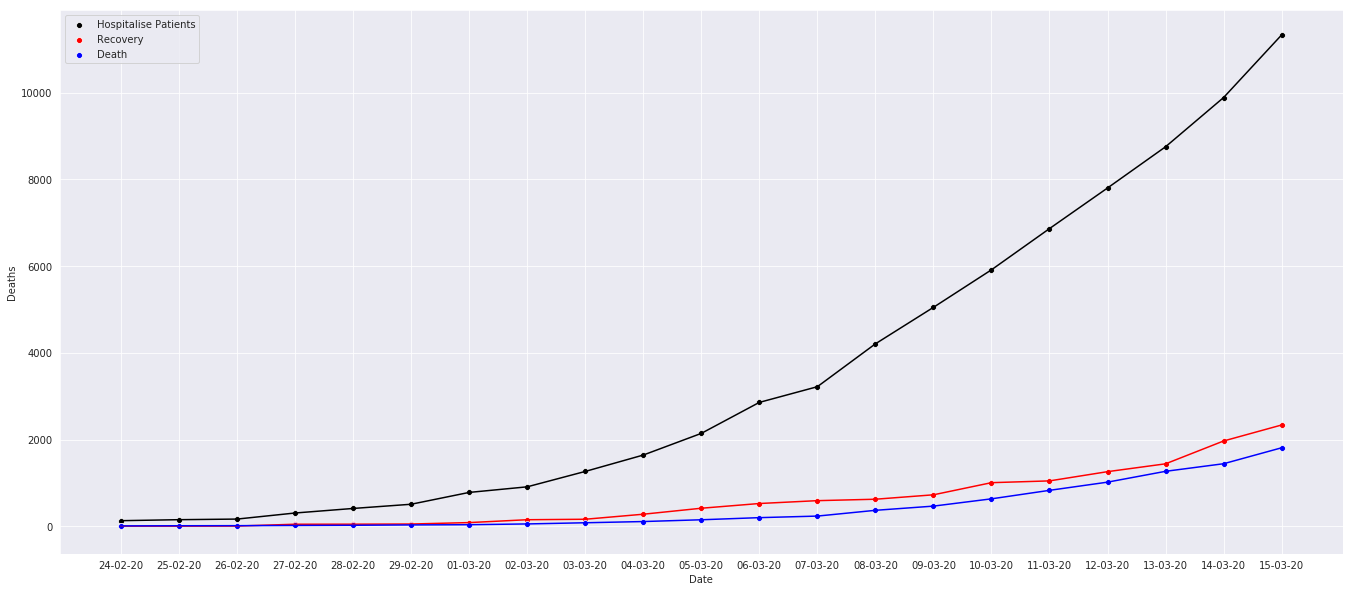

In [47]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalHospitalizedPatients,label="Hospitalise Patients")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Hospitalise vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalHospitalizedPatients", data=dgd2,
             color="black",label = "Hospitalise Patients")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalHospitalizedPatients,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

## Confirm vs Recovery vs Death

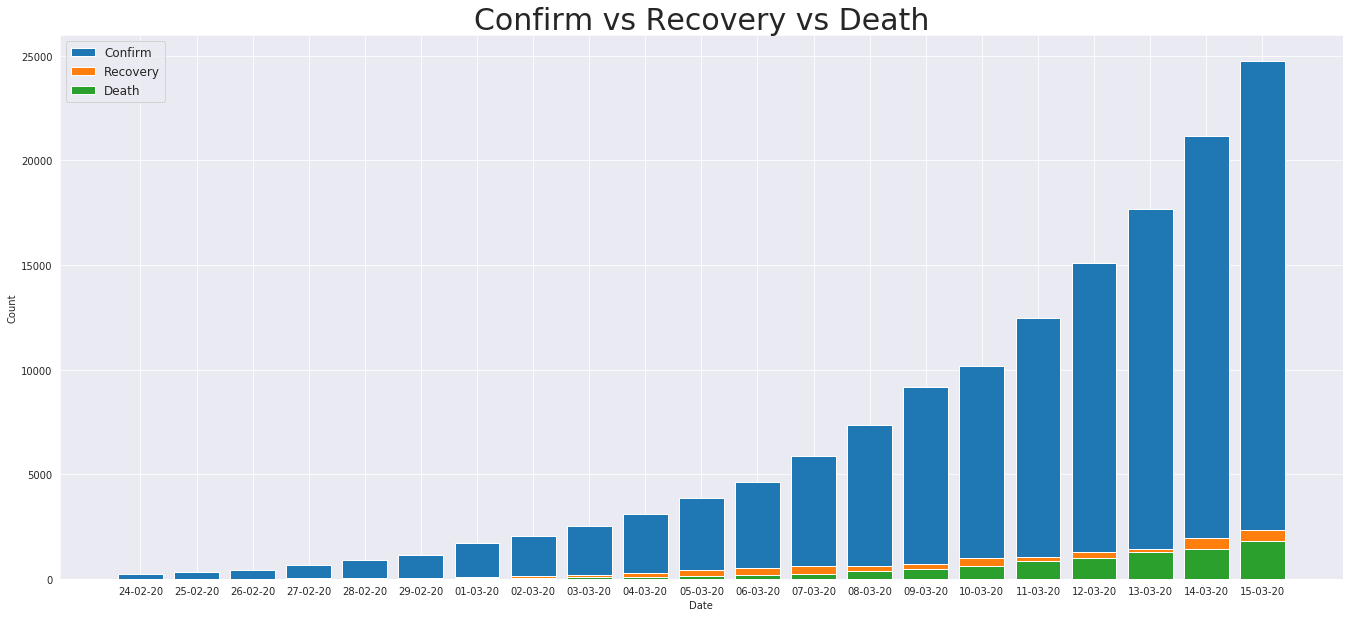

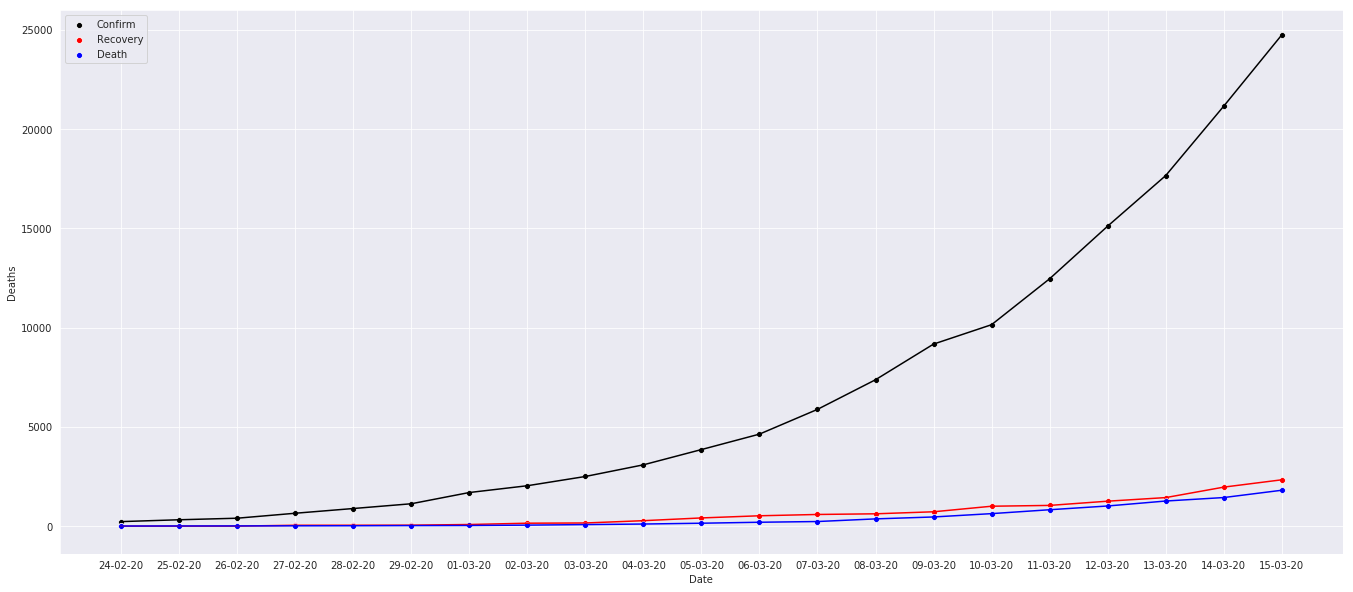

In [48]:
plt.figure(figsize=(23,10))
plt.bar(dgd2.Date, dgd2.TotalPositiveCases,label="Confirm")
plt.bar(dgd2.Date, dgd2.Recovered,label="Recovery")
plt.bar(dgd2.Date, dgd2.Deaths,label="Death")
plt.xlabel('Date')
plt.ylabel("Count")
plt.legend(frameon=True, fontsize=12)
plt.title('Confirm vs Recovery vs Death',fontsize=30)
plt.show()

f, ax = plt.subplots(figsize=(23,10))
ax=sns.scatterplot(x="Date", y="TotalPositiveCases", data=dgd2,
             color="black",label = "Confirm")
ax=sns.scatterplot(x="Date", y="Recovered", data=dgd2,
             color="red",label = "Recovery")
ax=sns.scatterplot(x="Date", y="Deaths", data=dgd2,
             color="blue",label = "Death")
plt.plot(dgd2.Date,dgd2.TotalPositiveCases,zorder=1,color="black")
plt.plot(dgd2.Date,dgd2.Recovered,zorder=1,color="red")
plt.plot(dgd2.Date,dgd2.Deaths,zorder=1,color="blue")

**This graph gives an overview of the current situation in Italy. There are now more than 12,000 confirmed cases. The numbers of deaths and recoveries are roughly equal. From the date the country confirmed its first case, the number has been increasing exponentially. On March 11, Italy became the second most infected country after China.**

> ### Prevention
To avoid infection, people should do the following things:
*  Avoid contact with people who are sick.
*  Avoid touching your eyes, nose, and mouth.
*  Stay home when you are sick.
*  Cover your cough or sneeze with a tissue, then throw the tissue in the trash.
*  Clean and disinfect frequently touched objects and surfaces
*  Wash your hands often with soap and water, especially after going to the bathroom; before eating; and after blowing your nose, coughing, or sneezing. If soap and water are not readily available, use an alcohol-based hand sanitizer.